# Ejemplo de Agglomerative Clustering

In [1]:
from sklearn.datasets import make_blobs # Generar clusters aleatorios
import matplotlib.pyplot as plt

In [57]:
X, label = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=4, random_state=25) # Generamos dataset de ejemplo

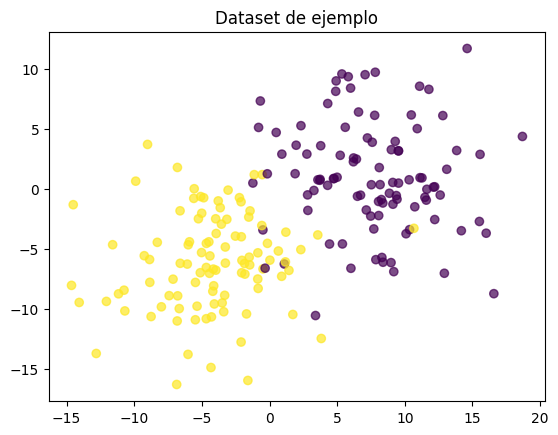

In [58]:
plt.scatter(X[:,0], X[:,1], c=label, alpha=0.7)
plt.title('Dataset de ejemplo')
plt.show();

In [59]:
print(X[:10]) # Imprimimos los 10 primeros puntos

[[  4.29339204   0.29577003]
 [ -5.47603309  -7.79491672]
 [ -5.09154586  -0.64002824]
 [  9.10856525   0.53529561]
 [ -4.86581399  -0.73845945]
 [  7.70800133  -3.33881853]
 [  4.43492138  -4.59413228]
 [ -4.08168722  -9.58943647]
 [  4.76895786   0.86144139]
 [-14.63726588  -8.04163946]]


## Aplicamos Agglomerative Clustering

In [60]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

Aplicamos clustering

In [152]:
agglo = AgglomerativeClustering(n_clusters=2, linkage='average') # Probar 'ward', 'single', 'complete', 'average'
agglo.fit(X) # Ejecutamos algoritmo

AgglomerativeClustering(linkage='average')

In [84]:
agglo.labels_

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0])

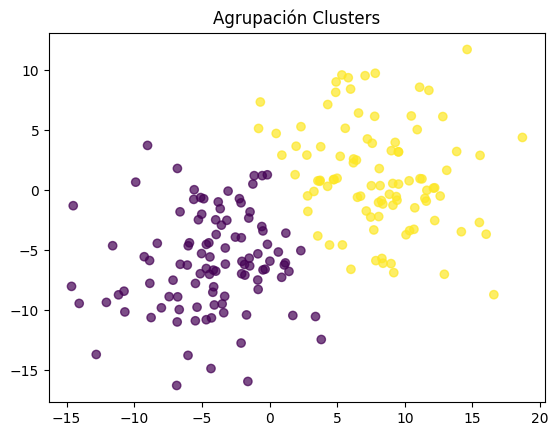

In [153]:
plt.scatter(X[:,0], X[:,1], c=agglo.labels_, alpha=0.7)
plt.title('Agrupación Clusters')
plt.show();

## Visualizar Dendrograma

In [86]:
# dendrogram -> Para representar el gráfico
# linkage -> Ejecutar el algoritmo completo y representar las uniones de forma intera
# fcluster -> Cortar el dendrograma y ver resultados
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

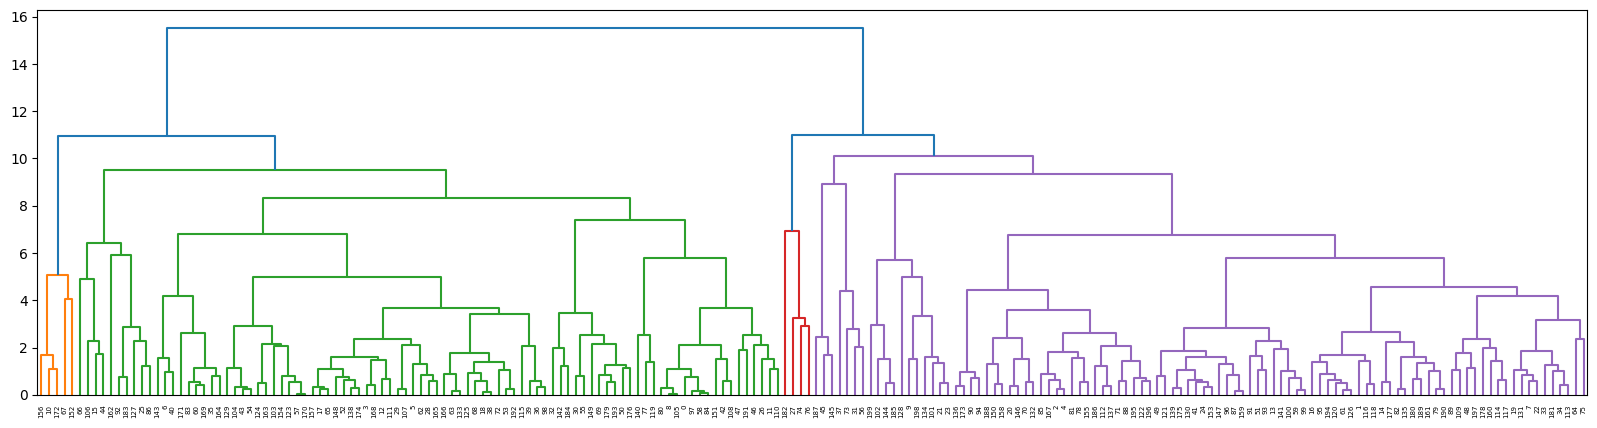

In [154]:
# Ejecutamos algoritmo aglomerativo
linkage_result = linkage(X, method='average') # Probar 'ward', 'single', 'complete', 'average'
# Mostramos dendrograma
plt.figure(figsize=(20,5))
dendrogram(linkage_result)
# plt.axhline(y=40, color='r', linestyle='--')
plt.show()

In [155]:
labels = fcluster(linkage_result, 14, criterion='distance') # Probar diferentes valores
pd.Series(labels).value_counts() # Muestra los puntos de cada cluster resultante

,count
2,104
1,96


## Dataset Lunas

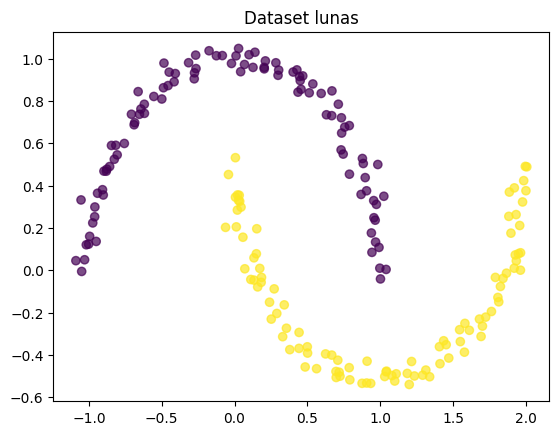

In [120]:
from sklearn.datasets import make_moons
X2, label2 = make_moons(n_samples=200, noise=0.04, random_state=567)

plt.scatter(X2[:, 0], X2[:, 1], c=label2, alpha=0.7)
plt.title("Dataset lunas")
plt.show()

In [129]:
agglo2 = AgglomerativeClustering(n_clusters=2, linkage='single') # Probar 'ward', 'single', 'complete', 'average'
agglo2.fit(X2)

AgglomerativeClustering(linkage='single')

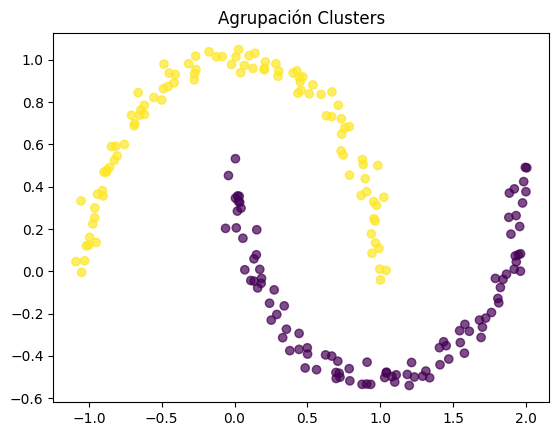

In [130]:
plt.scatter(X2[:,0], X2[:,1], c=agglo2.labels_, alpha=0.7)
plt.title('Agrupación Clusters')
plt.show();

# Círculos concéntricos

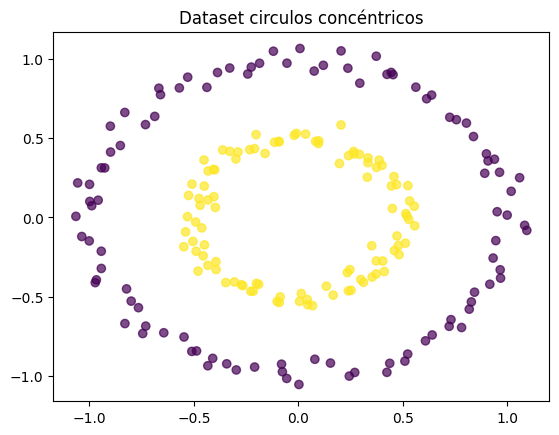

In [166]:
from sklearn.datasets import make_circles

X3, label3 = make_circles(n_samples=200, noise=0.04, random_state=231, factor=0.5)

plt.scatter(X3[:, 0], X3[:, 1], c=label3, alpha=0.7)
plt.title("Dataset circulos concéntricos")
plt.show()

## Make_classification

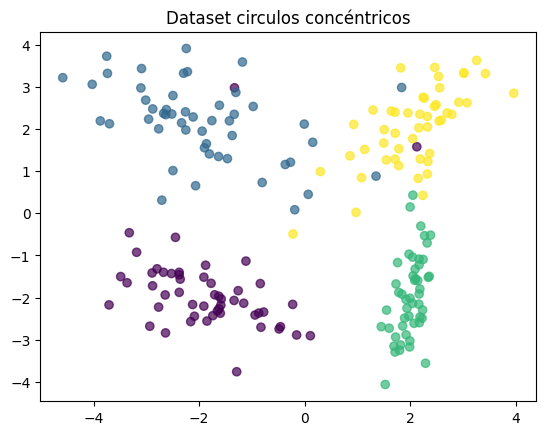

In [175]:
from sklearn.datasets import make_classification

# n_features -> Dimensiones, n_informative -> Dimensiones útiles
# n_classes -> Número de clusters, class_sep -> separación entre clústers
X4, label4 = make_classification(n_samples=200, n_features=2, random_state=53, n_informative=2, n_clusters_per_class=1, n_classes=4, class_sep=2, n_redundant=0)
plt.scatter(X4[:, 0], X4[:, 1], c=label4, alpha=0.7)
plt.title("Dataset circulos concéntricos")
plt.show()

## Clusters alargados

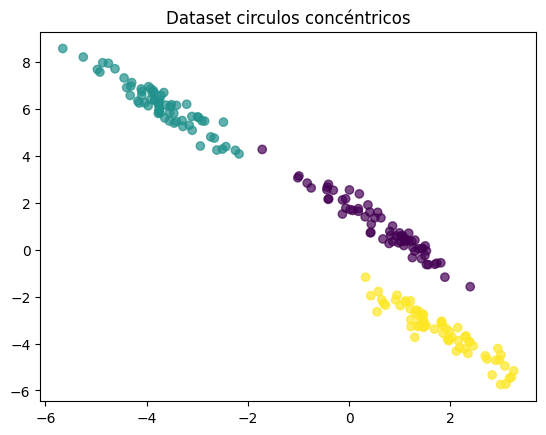

In [192]:
X5, label5 = make_blobs(n_samples=200, centers=[(4,4), (-2, 6), (0,-4)], n_features=2, cluster_std=1, random_state=170) # Generamos dataset de ejemplo

#x' = (x * 0.6) + (y * -0.4)
#y' = (x * -0.6) + (y * 0.8)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_transformed = np.dot(X5, transformation)

plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=label5, alpha=0.7)
plt.title("Dataset circulos concéntricos")
plt.show()

## Combinar datasets

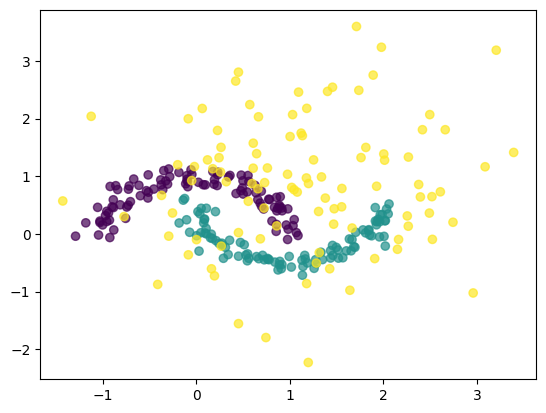

In [200]:
#dataset lunas
x_moons, label_moons = make_moons(n_samples=200, noise=0.1, random_state=123)

# Creamos blob (ruido de fondo)
x_noise, label_noise = make_blobs(n_samples=100, centers=[(1,1)], n_features=2, cluster_std=1, random_state=123)
label_noise[:] = 2

x_combinada = np.vstack((x_moons, x_noise))
label_combinada = np.hstack((label_moons, label_noise))

plt.scatter(x_combinada[:, 0], x_combinada[:, 1], c=label_combinada, alpha=0.7)
plt.show()